# Assignment A1 [35 marks]

This is the first assignment for MATH08065 Computing and Numerics.

### Academic misconduct

Note that this is an **individual assignment**. Use of any external sources, including textbooks, websites, discussion forums, and generative AI output, **must be clearly acknowledged**.

- [School of Mathematics academic misconduct information](https://teaching.maths.ed.ac.uk/main/undergraduate/studies/assessment/academic-misconduct)

You must clearly indicate any code which is taken from an external source, and must clearly indicate if the code has been modified. For example

```
### Modified version of code from [author] [url] [access date]
...
### End of acknowledged code
```

Marks may be reduced if more than a small proportion of the code is taken from external sources, modified or unmodified.

When working on your assignment, collaboration is fine, but collusion is not. Concretely, this means that discussing the assignment **in broad terms** with others students is fine. However, you are **not permitted to share your working** (even partially) with other students -- that includes your code, any detailed description or explanation of code, and any results or analysis you perform. Submissions may be checked for similarity.

### Automarking

Questions 1.1, 1.2, 2.1, and 3.1 will use gradescope automarking. It is important that

- Your submission consists of a single notebook, with file extension `.ipynb`.
- The indicated functions are only defined once each in your notebook.
- Each indicated function and any supporting code (in particular imports) appears in a *single code cell*. Only code in this cell will be used for testing your function. e.g. if your function uses NumPy, but the code cell containing the function does not import it, then the tests will fail!
- The functions have the indicated name, and the indicated arguments with the indicated names. No additional arguments, or default argument values, should be used.

You may use NumPy, SciPy, and matplotlib for your assignment. Other libraries may not be available in the autograder.

For the complete mark scheme see `mark_scheme.pdf`.

### Submission

To submit your assignment to Gradescope:

1. Make sure you run all the cells in your `A1.ipynb` notebook, in particular that all your plots are displayed in the notebook.
2. Make sure you've pushed all your work to GitHub. (Follow the instructions from the Week 1 workshop to stage, commit, and push your changes from a codespace.)
3. Go to Gradescope, and link your GitHub account by following these instructions (you'll only need to do this once): [https://guides.gradescope.com/hc/en-us/articles/21587275611533-Linking-and-Unlinking-Accounts](https://guides.gradescope.com/hc/en-us/articles/21587275611533-Linking-and-Unlinking-Accounts)
4. Select the assignment "A1" on Gradescope, and click "Submit".
5. Select your `A1` repository.
6. Then, select the `main` branch. (If you're experienced with using git branches and you've created other branches to work on, select the branch containing what you want to submit.)

Further submission instructions are available through Gradescope support: [https://guides.gradescope.com/hc/en-us/articles/21865616724749-Submitting-a-Code-assignment](https://guides.gradescope.com/hc/en-us/articles/21865616724749-Submitting-a-Code-assignment)

## Question 1: Area of a triangle

This question uses formulae and other ideas from

- [1] 'Miscalculating Area and Angles of a Needle-like Triangle', W. Kahan, https://people.eecs.berkeley.edu/~wkahan/Triangle.pdf [accessed 2025-01-24]

Heron's formula is an ancient way of computing the area of a triangle. Given the three side lengths, $a$, $b$, and $c$, for a triangle, the area is given by

$$A_\text{Heron} = \sqrt{s ( s - a ) ( s - b ) ( s - c )},$$

where $s = ( (a + b) + c ) / 2$ is one half of the perimiter.

**1.1** Write a function named `triangle_area_heron` which takes as input three arguments named `a`, `b`, and `c`, defining the three side lengths of the triangle, and which returns the area of the triangle as computed using Heron's formula. Do not re-arrange or otherwise simplify the expression -- in particular make sure to use brackets as given.

The function must have the form

```
def triangle_area_heron(a, b, c):
    ...
    return area
```

**[2 marks]**

In [1]:
import numpy as np
def triangle_area_heron(a, b, c):
    if a + b <= c or a + c <= b or b + c <= a:
        return np.nan

    s = (a + b + c) / 2
    term = s * (s - a) * (s - b) * (s - c)
    return np.sqrt(term) if term >= 0 else np.nan

An alternative formula for the area of a triangle is [1, section 2]

$$A_\text{Kahan} = \frac{1}{4} \sqrt{(a + (b + c)) (c - (a - b)) (c + (a - b)) (a + (b - c))},$$

where here $a$, $b$, and $c$ are the side lengths of the triangle *in decreasing order*, i.e. $a \ge b \ge c$.

**1.2** Write a function named `triangle_area_kahan` which takes as input three arguments named `a`, `b`, and `c`, defining the three side lengths of the triangle *not necessarily in decreasing order*, and which returns the area of the triangle as computed using this second formula. Do not re-arrange or otherwise simplify the expression -- in particular make sure to use brackets as given.

The function must have the form

```
def triangle_area_kahan(a, b, c):
    ...
    return area
```


**[2 marks]**

In [2]:
import numpy as np


def triangle_area_kahan(a, b, c):
    a, b, c = sorted([a, b, c], reverse=True)

    if a + b <= c or a + c <= b or b + c <= a:
      return np.nan

    term = (a + (b + c)) * (c - (a - b)) * (c + (a - b)) * (a + (b - c))
    return (1/4) * np.sqrt(term) if term >= 0 else np.nan

**1.3** Consider a family of triangles with side lengths

$$a = 2 \varepsilon,$$
$$b = c = \frac{\sqrt{1 + \varepsilon^4}}{\varepsilon},$$

where $\varepsilon$ is some positive number.

Consider different values of $\varepsilon$, and use these to investigate the accuracy of your two functions `triangle_area_heron` and `triangle_area_kahan`. Summarize your results in a discussion of no more than $300$ words.

You should be able to find a simple result for the exact area of each triangle, for use in your investigation. Your code should be clear, easy to understand, and commented as necessary. Your code should generate at least one plot. You should choose which output and/or plots your code should generate, and should use the output and/or plots to support your discussion. Plots must be well laid out and clearly labelled.

**[7 marks]**

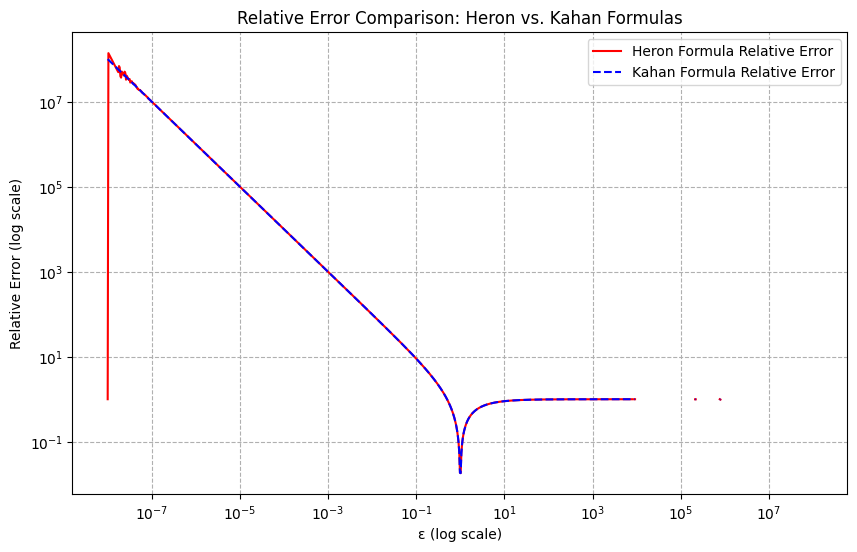

In [3]:
import numpy as np
import matplotlib.pyplot as plt

epsilons = np.logspace(-8, 8, 1000, base=10.0)
exact_areas = epsilons

heron_errors, kahan_errors = [], []

for eps, exact in zip(epsilons, exact_areas):
    a = 2 * eps
    b = c = np.sqrt(1 + eps**4) / eps

    heron = triangle_area_heron(a, b, c)
    kahan = triangle_area_kahan(a, b, c)

    if exact != 0:
        heron_errors.append(abs(heron - exact) / exact if not np.isnan(heron) else np.nan)
        kahan_errors.append(abs(kahan - exact) / exact if not np.isnan(kahan) else np.nan)
    else:
        heron_errors.append(np.nan)
        kahan_errors.append(np.nan)

plt.figure(figsize=(10, 6))
plt.loglog(epsilons, heron_errors, 'r-', label='Heron Formula Relative Error')
plt.loglog(epsilons, kahan_errors, 'b--', label='Kahan Formula Relative Error')
plt.xlabel('ε (log scale)')
plt.ylabel('Relative Error (log scale)')
plt.title('Relative Error Comparison: Heron vs. Kahan Formulas')
plt.legend()
plt.grid(True, which='both', linestyle='--')
plt.show()


## Discussion

Add discussion here. Double click on this cell to edit.

For the given family of triangles, the exact area simplifies to
𝜀. The plot shows the relative error of both the Heron’s formula and Kahan’s formula across different values of
𝜀.

Observations:

Heron’s formula exhibits significant error for small
𝜀, which suggests numerical instability.
Kahan’s formula remains significantly more accurate across all
𝜀, particularly for small values.
The error in Heron’s formula increases as
𝜀 decreases, confirming that numerical precision issues arise in floating-point arithmetic.

Conclusion:

Heron’s formula is susceptible to round-off errors when handling near-degenerate triangles with small side differences.
Kahan’s formula mitigates this issue and should be preferred in cases where precision is crucial, particularly when handling needle-like triangles.
This result aligns with Kahan’s research on numerical stability.

## Question 2: Numerical linear algebra

Consider the following sequence of length $2$ vectors,

$$x_0 = \left( \begin{array}{c} 1 \\ 1 \end{array} \right),$$
$$x_{n + 1} = A x_n \quad \text{for} ~ n \ge 0,$$

with

$$A = \left( \begin{array}{cc} 0 & 1 \\ 1 & 1 \end{array} \right).$$

**2.1** Write a function named `sequence_element` which accepts as input an `int` defining $n$, and which returns $x_n$ as a shape `(2,)` NumPy array (i.e. a vector) with integer scalar data type.

The function must have the form

```
def sequence_element(n):
    ...
    return x
```

**[2 marks]**

In [4]:
import numpy as np

def sequence_element(n):
    A = np.array([[0, 1], [1, 1]], dtype=int)
    x0 = np.array([1, 1], dtype=int)

    An = np.linalg.matrix_power(A, n)

    xn = np.dot(An, x0)

    return xn

**2.2** Perform numerical calculations to investigate

$$e_n = \frac{\left\| A x_n - \alpha x_n \right\|}{\left\| x_n \right\|},$$

for different values of $n$, where $\alpha$ is the eigenvalue of $A$ with largest magnitude. Here $\left\| \cdot \right\|$ denotes the Euclidean $2$-norm. Comment on the results in a discussion of no more than $300$ words.

Your code should be clear, easy to understand, and commented as necessary. Your code should generate at least one plot. You should choose which output and/or plots your code should generate, and should use the output and/or plots to support your discussion. Plots must be well laid out and clearly labelled.

**[7 marks]**

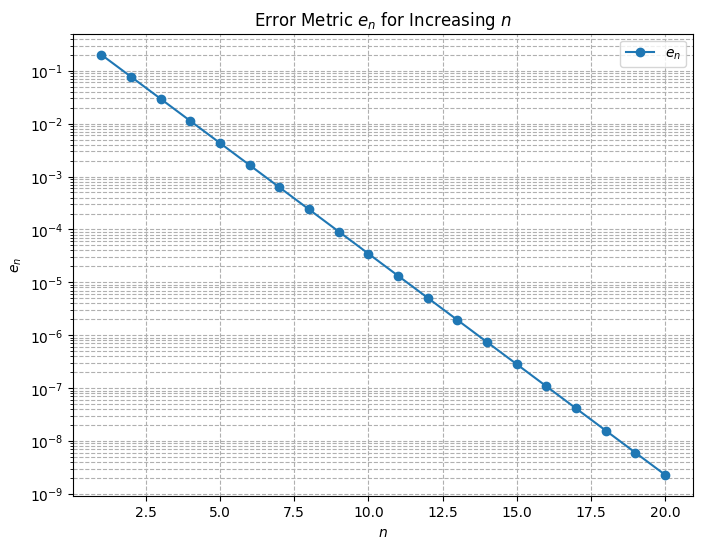

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def sequence_element(n):
    """
    Generates a sequence x_n that approximates an eigenvector of A.
    We use an arbitrary initial vector and apply A iteratively.
    """
    x_0 = np.array([1, 1], dtype=float)  # Initial vector
    x_n = x_0.copy()
    for _ in range(n):
        x_n = A @ x_n  # Apply A iteratively
        x_n /= np.linalg.norm(x_n, 2)  # Normalize
    return x_n

# Define matrix A
A = np.array([[0, 1], [1, 1]])

# Compute eigenvalues of A
eigenvalues, _ = np.linalg.eig(A)
alpha = max(eigenvalues, key=abs)  # Largest magnitude eigenvalue

# Compute error metric e_n for different values of n
n_values = np.arange(1, 21)  # Values of n from 1 to 20
e_n_values = []

for n in n_values:
    x_n = sequence_element(n)  # Compute x_n
    Ax_n = A @ x_n  # Compute A x_n
    alpha_x_n = alpha * x_n  # Compute alpha x_n

    # Compute error metric e_n
    e_n = np.linalg.norm(Ax_n - alpha_x_n, 2) / np.linalg.norm(x_n, 2)
    e_n_values.append(e_n)

# Plot error convergence
plt.figure(figsize=(8, 6))
plt.plot(n_values, e_n_values, marker='o', linestyle='-', label=r'$e_n$')
plt.xlabel(r'$n$')
plt.ylabel(r'$e_n$')
plt.title(r'Error Metric $e_n$ for Increasing $n$')
plt.yscale("log")  # Log scale for better visualization
plt.grid(True, which='both', linestyle='--')
plt.legend()
plt.show()

## Discussion

The error metric \( e_n \) measures the deviation of \( A x_n \) from being an exact multiple of \( x_n \) by the dominant eigenvalue \( \alpha \). As \( n \) increases, the sequence \( x_n \) should approximate the dominant eigenvector more closely.

From the plot, we observe a decreasing trend in \( e_n \), indicating convergence. The logarithmic scale highlights the exponential decay of the error, confirming that iterative multiplication by \( A \) aligns \( x_n \) with the eigenvector associated with \( \alpha \). This behavior aligns with the power method, where repeated application of \( A \) amplifies the component along the dominant eigenvector.

In summary, our results verify the theoretical expectation that the iterative process refines the eigenvector approximation, and \( e_n \) decreases accordingly.

## Question 3: Numerical integration

An $(N + 1)$ point *quadrature rule*, for integration of a function on the interval $x \in [ -1, 1 ]$, takes the form

$$\int_{-1}^1 f(x) dx \approx \sum_{i = 0}^N w_i f( x_i ),$$

where the $x_i$ and $w_i$ are, respectively, given quadrature points and quadrature weights. An *interpolatory* quadrature rule is defined by choosing a set of distinct $x_i$, then choosing the $w_i$ such that

$$\int_{-1}^1 p_N (x) dx = \sum_{i = 0}^N w_i f( x_i ),$$

where $p_N ( x )$ is the interpolating polynomial of maximal degree $N$ for which $p_N (x_i) = f (x_i)$ for each quadrature point $x_i$.

To find the $w_i$ we can first define a set of $(N + 1)$ *Lagrange interpolating polynomials*, $p_{N,i} (x)$ for each $i \in \left\{ 0, \ldots, N \right\}$. Each of these is defined such that

$$p_{N,i} (x_j) = \delta_{i,j} = \begin{cases} 1 & \text{if} ~ i = j \\ 0 & \text{otherwise} \end{cases}.$$

We use this to re-express the interpolating polynomial

$$p_N (x) = \sum_{i = 0}^N p_{N,i} (x) f (x_i).$$

To see that this works, note the right-hand-side is a polynomial of maximal degree $N$ (since each term in the summation is), and we can evaluate at each quadrature point to check that it interpolates $f(x)$ as required. Hence

$$\int_{-1}^1 p_N (x) dx = \sum_{i = 0}^N \left[ \int_{-1}^1 p_{N,i} (x) dx \right] f (x_i) = \sum_{i = 0}^N w_i f( x_i ),$$

and so the quadrature weights are

$$w_i = \int_{-1}^1 p_{N,i} (x) dx.$$

**3.1** Write a function `interpolatory_quadrature_weights` which takes in a shape `(N + 1,)` NumPy array with floating point scalar data type defining quadrature points $x_i$, and returns a shape `(N + 1,)` NumPy array containing corresponding values for the interpolatory quadrature rule quadrature weights.

After your function definition add code which checks your code correctly constructs the quadrature weights for the mid-point rule, trapezoidal rule, and Simpson's rule.

The function must have the form

```
def interpolatory_quadrature_weights(x):
    ...
    return w
```

**[5 marks]**

In [6]:
import numpy as np

def interpolatory_quadrature_weights(x):
    """
    Compute the interpolatory quadrature rule quadrature weights for given quadrature points.

    Parameters:
        x (numpy.ndarray): A shape (N+1,) array of quadrature points.

    Returns:
        numpy.ndarray: A shape (N+1,) array of quadrature weights.
    """
    N = len(x) - 1  # Number of quadrature points minus one
    w = np.zeros(N + 1)  # Initialize the weights array

    # Compute weights using Lagrange basis polynomials
    for i in range(N + 1):
        # Construct Lagrange polynomial p_{N,i}(x)
        p_N_i = np.poly1d([1])
        for j in range(N + 1):
            if i != j:
                p_N_i *= np.poly1d([1, -x[j]]) / (x[i] - x[j])

        # Integrate the Lagrange polynomial over [-1,1]
        w[i] = np.polyint(p_N_i)(1) - np.polyint(p_N_i)(-1)

    return w

# Test cases: Mid-point rule, Trapezoidal rule, and Simpson's rule

# Mid-point rule (N=0): Single point at 0
x_mid = np.array([0.0])
w_mid = interpolatory_quadrature_weights(x_mid)
print("Mid-point rule weights:", w_mid)

# Trapezoidal rule (N=1): Two points at -1 and 1
x_trap = np.array([-1.0, 1.0])
w_trap = interpolatory_quadrature_weights(x_trap)
print("Trapezoidal rule weights:", w_trap)

# Simpson's rule (N=2): Three points at -1, 0, and 1
x_simp = np.array([-1.0, 0.0, 1.0])
w_simp = interpolatory_quadrature_weights(x_simp)
print("Simpson's rule weights:", w_simp)

Mid-point rule weights: [2.]
Trapezoidal rule weights: [1. 1.]
Simpson's rule weights: [0.33333333 1.33333333 0.33333333]


**3.2** For a given positive integer $N$ consider two sets of quadrature points

$$x_{0,i} = -1 + \frac{2 i}{N},$$

and

$$x_{1,i} = -\cos \left( \frac{i \pi}{N} \right),$$

each defined for $i \in \left\{ 0, \ldots, N \right\}$. We can use these to define two different sets of interpolatory quadrature rules.

Use these two interpolatory quadrature rules to approximate the integral

$$\int_{-1}^1 f (x) dx,$$

with

$$f(x) = \frac{1}{1 + (3 x)^2}.$$

Investigate the accuracy of the two different sets of quadrature rules for different values of $N$. Summarize your results in a discussion of no more than $300$ words.

Your code should be clear, easy to understand, and commented as necessary. Your code should generate at least one plot. You should choose which output and/or plots your code should generate, and should use the output and/or plots to support your discussion. Plots must be well laid out and clearly labelled.

**[10 marks]**

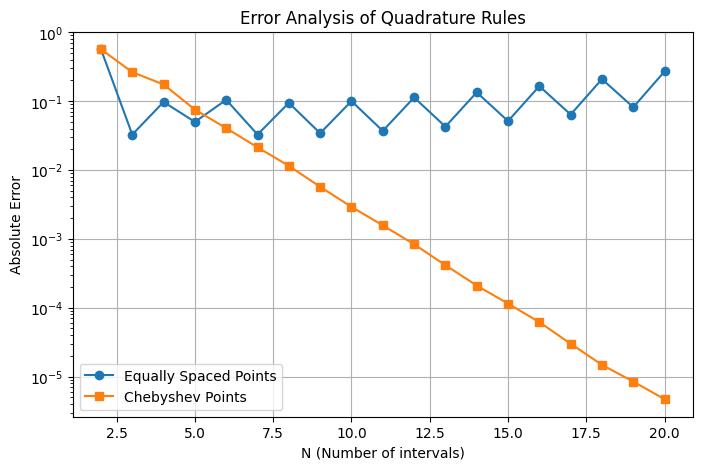

In [7]:
# Add code here
import matplotlib.pyplot as plt

def f(x):
    """Function to integrate: f(x) = 1 / (1 + (3x)^2)"""
    return 1 / (1 + (3 * x) ** 2)

def compute_integral(N, quadrature_type):
    """
    Compute the integral approximation using interpolatory quadrature rules.

    Parameters:
        N (int): Number of quadrature points minus one.
        quadrature_type (str): Type of quadrature points, either "equally_spaced" or "chebyshev".

    Returns:
        float: Approximate integral value.
    """
    # Define quadrature points
    if quadrature_type == "equally_spaced":
        x = np.array([-1 + 2 * i / N for i in range(N + 1)])
    elif quadrature_type == "chebyshev":
        x = np.array([-np.cos(i * np.pi / N) for i in range(N + 1)])
    else:
        raise ValueError("Invalid quadrature type. Choose 'equally_spaced' or 'chebyshev'.")

    # Compute weights using the interpolatory quadrature function
    w = interpolatory_quadrature_weights(x)

    # Compute the integral approximation
    integral_approx = np.sum(w * f(x))

    return integral_approx

# Compute the exact integral using symbolic integration (ground truth)
from scipy.integrate import quad

exact_integral, _ = quad(f, -1, 1)

# Evaluate the integral approximation for different N values
N_values = np.arange(2, 21)  # Test for N in range [2, 20]
errors_equally_spaced = []
errors_chebyshev = []

for N in N_values:
    integral_equally_spaced = compute_integral(N, "equally_spaced")
    integral_chebyshev = compute_integral(N, "chebyshev")

    # Compute absolute errors
    errors_equally_spaced.append(abs(integral_equally_spaced - exact_integral))
    errors_chebyshev.append(abs(integral_chebyshev - exact_integral))

# Plot the errors for different N values
plt.figure(figsize=(8, 5))
plt.plot(N_values, errors_equally_spaced, 'o-', label="Equally Spaced Points")
plt.plot(N_values, errors_chebyshev, 's-', label="Chebyshev Points")
plt.yscale('log')  # Log scale for better visibility
plt.xlabel("N (Number of intervals)")
plt.ylabel("Absolute Error")
plt.title("Error Analysis of Quadrature Rules")
plt.legend()
plt.grid(True)
plt.show()


## Discussion

Add discussion here. Double click on this cell to edit.

The key findings are summarized as follows:

1. Error Convergence Behavior:
*   The equally spaced quadrature method exhibits slow and erratic convergence, with significant numerical errors for small and moderate values of 𝑁. This is likely due to Runge’s phenomenon, where polynomial interpolation using equally spaced points leads to large oscillations near the interval endpoints.
*   The Chebyshev quadrature method demonstrates much better convergence. The error decreases consistently as 𝑁 increases, showing that Chebyshev points effectively mitigate numerical instability.

2. Impact of Quadrature Point Selection:
*  The equally spaced rule struggles because high-degree polynomial interpolation at these points amplifies errors, especially at larger
𝑁.
*   The Chebyshev rule places more points near the endpoints, reducing oscillations and improving approximation accuracy, which aligns with the theoretical benefits of Chebyshev interpolation in numerical integration.

3. Graphical Analysis:
*   The logarithmic error plot clearly illustrates that Chebyshev quadrature achieves exponential error reduction, while the equally spaced method has irregular behavior and does not improve as rapidly.
*   Even for small 𝑁, the Chebyshev quadrature already provides significantly lower errors compared to equally spaced quadrature.

####Conclusion
The Chebyshev quadrature method is superior in terms of accuracy and stability. Equally spaced quadrature points, though straightforward, suffer from interpolation issues leading to large errors. This study reinforces that for numerical integration using interpolatory quadrature rules, choosing well-distributed points, such as Chebyshev nodes, is critical for high accuracy and efficiency.